In [45]:
from Plot import *
path = np.load('new_data/ch_data_letter_dir_0/e_1.npy')

In [46]:
ANGLE_THRESHOLD = np.pi / 5
MERGE_THRESHOLD = 15
MERGE_DIST_THRESHOLD = 1
HV_THRESHOLD = 0.6
HV_AVG_THRESHOLD = 0.5

def angleDiff(u, v):
    ang1 = np.arctan2(u[1], u[0])
    ang2 = np.arctan2(v[1], v[0])
    return 2 * np.pi - abs(ang1 -
                            ang2) if abs(ang1 -
                                        ang2) >= np.pi else abs(ang1 -
                                                                ang2)

# smooth the path
x, y, d = getAveragePath(path,False)
x = gaussian_filter1d(x, sigma=5)
y = gaussian_filter1d(y, sigma=5)

# filter the turning points that seperates angles
debug_dir = []
debug_dir.append(0)
i = 1
while i < len(x):
    cur_v = (x[i] - x[i - 1], y[i] - y[i - 1])
    j = i
    while j < len(x) and angleDiff(
        (x[j] - x[j - 1], y[j] - y[j - 1]),
            cur_v) < ANGLE_THRESHOLD and angleDiff(
                (x[j] - x[j - 1], y[j] - y[j - 1]),
                (x[i] - x[i - 1], y[i] - y[i - 1])) < ANGLE_THRESHOLD:
        cur_v = (x[j] - x[i - 1], y[j] - y[i - 1])
        j += 1
    debug_dir.append(j-1)
    i = j

# merge points that are enough close to each other
i = 0
simplified_dir = []
while i < len(debug_dir):
    t = []
    lat = debug_dir[i]
    while i < len(debug_dir) and (debug_dir[i] - lat < MERGE_THRESHOLD or (x[debug_dir[i]]-x[lat])**2+(y[debug_dir[i]]-y[lat])**2<MERGE_DIST_THRESHOLD):
        t.append(debug_dir[i])
        lat = debug_dir[i]
        i += 1
    simplified_dir.append(int(np.mean(t)))

simplified_dir.append(len(x) - 1)

# calculate the average of x/y offsets
x_avg, y_avg = 0, 0
for u, v in list(zip(simplified_dir[:-1], simplified_dir[1:])):
    if abs(x[v] - x[u]) > abs(y[v] - y[u]):
        x_avg += abs(x[v] - x[u])
    else:
        y_avg += abs(y[v] - y[u])
x_avg = x_avg / (len(simplified_dir) - 1)
y_avg = y_avg / (len(simplified_dir) - 1)

# filter the turning points that are far enough to each other
filtered_dir = []
for sd in simplified_dir:
    if len(filtered_dir) <= 0:
        filtered_dir.append(sd)
        continue
    x_off = abs(x[sd] - x[filtered_dir[-1]])
    y_off = abs(y[sd] - y[filtered_dir[-1]])
    if x_off > y_off and x_off > x_avg * HV_AVG_THRESHOLD and x_off > HV_THRESHOLD:
        filtered_dir.append(sd)
    elif y_off > x_off and y_off > y_avg * HV_AVG_THRESHOLD and y_off > HV_THRESHOLD:
        filtered_dir.append(sd)
    elif x_off == y_off and (
        (x_off > x_avg * HV_AVG_THRESHOLD and x_off > HV_THRESHOLD) or
        (y_off > y_avg * HV_AVG_THRESHOLD and y_off > HV_THRESHOLD)):
        filtered_dir.append(sd)

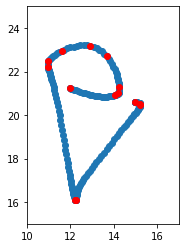

In [48]:
%matplotlib inline
plt.axis("scaled")
plt.xlim(10, 17)
plt.ylim(15, 25)
plt.scatter(x,y)
for f_d in debug_dir:
    plt.scatter([x[f_d]],[y[f_d]],c='red')

In [39]:
i=83
j=105
(x[i]-x[j])**2+(y[i]-y[j])**2


0.740682513775795